# **Mini-Batch Gradient code** - (Post Read)



Lets implement Mini-batch gradient Descent

#### Importing libraries


In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

#### Creating a dummy data

Creaing a 5000 data with only one feature

- multivariate_normal documentation: https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

In [2]:
mean = np.array([4.0, 5.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
data = np.random.multivariate_normal(mean, cov, 5000)

In [3]:
data.shape

(5000, 2)

In [4]:
data[:5]

array([[3.7863837 , 4.88334381],
       [3.73710764, 4.51386805],
       [4.43709024, 6.63887424],
       [2.26563276, 3.46820062],
       [5.49575764, 6.06569315]])

Plotting the data

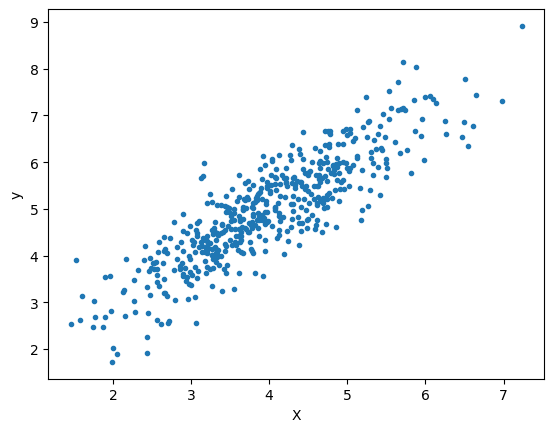

In [5]:
# visualising data
plt.scatter(data[:500, 0], data[:500, 1], marker = '.')
plt.xlabel('X')
plt.ylabel('y')

plt.show()


**Observe**

Clearly we see a linear relationship, hence using Linear Regression with Mini-Batch GD

In [6]:
# adding bias column (for w0) to data
data = np.hstack((np.ones((data.shape[0], 1)), data))

In [7]:
data[:5]

array([[1.        , 3.7863837 , 4.88334381],
       [1.        , 3.73710764, 4.51386805],
       [1.        , 4.43709024, 6.63887424],
       [1.        , 2.26563276, 3.46820062],
       [1.        , 5.49575764, 6.06569315]])

In [8]:
X = data[: ,:-1]
y = data[:, -1].reshape(-1,1)

#### Model Output $\hat{y_i}$

In [10]:
# Model output function
def predict(X, weight):
    return np.dot(X, weight)

#### Calculating Gradient

In [11]:
# function to compute gradient of error function w.r.t. weight
def gradient(X, y, weight):
    y_pred = predict(X, weight)
    grad = np.dot(X.transpose(), (y_pred - y))
    return grad

#### Calculating MSE

In [12]:
# function to compute the error for current values of weight
def cost(X, y, weight):
    y_pred = predict(X, weight)
    e = np.mean((y-y_pred)**2)

    return e

#### Creating mini batches

dividing the data into sets of 32 datapoints,
- hence minibatch_count  contains = $\frac{5000}{32} = 156.25 = 156 $ sets

- Meaning count($B1,B2,B3...Bi$) = 156

In [13]:
# function to create a list containing mini-batches
def create_mini_batches(X, y, batch_size = 32):

    mini_batches = []
    data = np.hstack((X, y))

    # Already shuffling the data so choosing any set of 32 , will create the same scenario as randomly selecting 32 points
    np.random.shuffle(data)
    minibatch_count = data.shape[0] // batch_size
    i = 0

    for i in range(minibatch_count + 1):
        # stores 32 datapoint for a single set out of 156
        mini_batch = data[i * batch_size: (i + 1)*batch_size, :]
        X_minibatch = mini_batch[:, :-1]
        Y_minibatch = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_minibatch, Y_minibatch))

    return mini_batches

#### Implementing Mini batch GD

In [14]:
# function to perform mini-batch gradient descent
def gradientDescent(X, y, learning_rate = 0.0001, batch_size = 32):
    weight = np.zeros((X.shape[1], 1))
    error_list = []
    max_iters = 3

    for itr in range(max_iters):
        # creates mini- batch
        mini_batches = create_mini_batches(X, y, batch_size)

        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            weight = weight - learning_rate * gradient(X_mini, y_mini, weight)
            error_list.append(cost(X_mini, y_mini, weight))

    return weight, error_list

**Observe**

The only difference from the earlier scratch implementation of Linear Regression and here is:
- The introduction of **mini_batches**

Plotting the weights of the Linear Regression

w_0 =  [0.35075974]
w_1 =  [[1.14585738]]


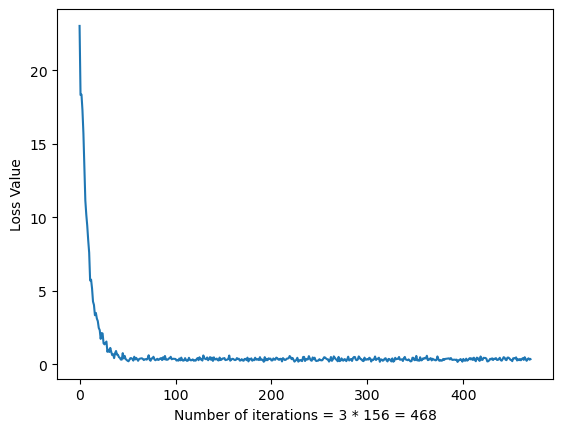

In [15]:
weight, error_list = gradientDescent(X, y)
print("w_0 = ", weight[0])
print("w_1 = ", weight[1:])

# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations = 3 * 156 = 468")
plt.ylabel("Loss Value")
plt.show()

#### We only select iteration as 3 but plot shows iteration as 468, Why ?

Ans: As we have 156 sets of 32 datapoints, and there is 3 iteration:
- total iteration = $3 \times 156 = 468$